# Linear Regression

:label:`chapter_linear_regression`


To start off, we will introduce the problem of regression.
This is the task of predicting a *real valued target* $y$
given a data point $\mathbf{x}$.
Regression problems are common in practice, arising
whenever we want to predict a continuous numerical value.
Some examples of regression problems include
predicting house prices, stock prices,
length of stay (for patients in the hospital),
tomorrow's temperature, demand forecasting (for retail sales), and many more.
Note that not every prediction problem is a regression problem.
In subsequent sections we will discuss classification problems,
where our predictions are discrete categories.

## Basic Elements of Linear Regression

Linear regression, which dates to Gauss and Legendre,
is perhaps the simplest, and by far the most popular approach
to solving regression problems.
What makes linear regression *linear* is that
we assume that the output truly can be expressed
as a *linear* combination of the input features.


### Linear Model

To keep things simple, we will start with running example
in which we consider the problem
of estimating the price of a house (e.g. in dollars)
based on area (e.g. in square feet) and age (e.g. in years).
More formally, the assumption of linearity suggests
that our model can be expressed in the following form:

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b$$

In economics papers, it is common for authors to write out linear models in this format with a gigantic equation that spans multiple lines containing terms for every single feature.
For the high-dimensional data that we often address in machine learning,
writing out the entire model can be tedious.
In these cases, we will find it more convenient to use linear algebra notation.
In the case of $d$ variables, we could express our prediction $\hat{y}$ as follows:

$$\hat{y} = w_1 \cdot x_1 + ... + w_d \cdot x_d + b$$

or alternatively, collecting all features into a single vector $\mathbf{x}$ and all parameters into a vector $\mathbf{w}$, we can express our linear model as $\hat{y} = \mathbf{w}^T \mathbf{x} + b$.

Above, the vector $\mathbf{x}$ corresponds to a single data point.
Commonly, we will want notation to refer to
the entire dataset of all input data points.
This matrix, often denoted using a capital letter $X$,
is called the *design matrix* and contains one row for every example,
and one column for every feature.

Given a collection of data points $X$ and a vector
containing the corresponding target values $\mathbf{y}$,
the goal of linear regression is to find
the *weight* vector $w$ and bias term $b$
(also called an *offset* or *intercept*)
that associates each data point $\mathbf{x}_i$
with an approximation $\hat{y}_i$ of its corresponding label $y_i$.

Expressed in terms of a single data point,
this gives us the expression (same as above)
$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$.

Finally, for a collection of data points $\mathbf{X}$,
the predictions $\hat{\mathbf{y}}$ can be expressed via the matrix-vector product:

$${\hat{\mathbf{y}}} = X \mathbf{w} + b$$

Even if we believe that the best model
to relate $\mathbf{x}$ and $y$ is linear,
it's unlikely that we'd find data where $y$
lines up exactly as a linear function of $\mathbf{x}$.
For example, both the target values $y$ and the features $X$
might be subject to some amount of measurement error.
Thus even when we believe that the linearity assumption holds,
we will typically incorporate a noise term to account for such errors.

Before we can go about solving for the best setting of the parameters $w$ and $b$, we will need two more things:
(i) some way to measure the quality of the current model
and (ii) some way to manipulate the model to improve its quality.

### Training Data

The first thing that we need is training data.
Sticking with our running example, we'll need some collection of examples
for which we know both the actual selling price of each house
as well as their corresponding area and age.
Our goal is to identify model parameters
that minimize the error between the predicted price and the real price.
In the terminology of machine learning, the data set is called a ‘training data’ or ‘training set’, a house (often a house and its price) here comprises one ‘sample’, and its actual selling price is called a ‘label’.
The two factors used to predict the label
are called ‘features’ or 'covariates'.

Typically, we will use $n$ to denote the number of samples in our dataset.
We index the samples by $i$, denoting each input data point as $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$ and the corresponding label as $y^{(i)}$.

### Loss Function

In model training, we need to measure the error
between the predicted value and the real value of the price.
Usually, we will choose a non-negative number as the error.
The smaller the value, the smaller the error.
A common choice is the square function.
For given parameters $\mathbf{w}$ and $b$,
we can express the error of our prediction on a given a sample as follows:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$

The constant $1/2$ is just for mathematical convenience,
ensuring that after we take the derivative of the loss,
the constant coefficient will be $1$.
The smaller the error, the closer the predicted price is to the actual price, and when the two are equal, the error will be zero.

Since the training dataset is given to us, and thus out of our control,
the error is only a function of the model parameters.
In machine learning, we call the function that measures the error the ‘loss function’.
The squared error function used here is commonly referred to as ‘square loss’.

To make things a bit more concrete, consider the example below where we plot a regression problem for a one-dimensional case, e.g. for a model where house prices depend only on area.

![Linear regression is a single-layer neural network. ](../img/linearregression.svg)

As you can see, large differences between estimates $\hat{y}^{(i)}$ and observations $y^{(i)}$ lead to even larger contributions in terms of the loss, due to the quadratic dependence. To measure the quality of a model on the entire dataset, we can simply average the losses on the training set.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

When training the model, we want to find parameters ($\mathbf{w}^*, b^*$) that minimize the average loss across all training samples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$


### Analytic Solution

Linear regression happens to be an unusually simple optimization problem.
Unlike nearly every other model that we will encounter in this book,
linear regression can be solved easily with a simple formula,
yielding a global optimum.
To start we can subsume the bias $b$ into the parameter $\mathbf{w}$
by appending a column to the design matrix consisting of all $1s$.
Then our prediction problem is to minimize $||\mathbf{y} - X\mathbf{w}||$.
Because this expression has a quadratic form it is clearly convex,
and so long as the problem is not degenerate
(our features are linearly independent), it is strictly convex.

Thus there is just one global critical point on the loss surface
corresponding to the global minimum.
Taking the derivative of the loss with respect to $\mathbf{w}$
and setting it equal to 0 gives the analytic solution:

$$\mathbf{w}^* = (X^T X)^{-1}X^T y$$

While simple problems like linear regression may admit analytic solutions,
you should not get used to such good fortune.
Although analytic solutions allow for nice mathematical analysis,
the requirement of an analytic solution confines one to
an restrictive set of models that would exclude all of deep learning.

### Gradient descent

Even in cases where we cannot solve the models analytically,
and even when the loss surfaces are high-dimensional and nonconvex,
it turns out that we can still make progress.
Moreover, when those difficult-to-optimize models are sufficiently superior for the task at hand, figuring out how to train them is well worth the trouble.

The key trick behind nearly all of deep learning
and that we will repeatedly throughout this book
is to reduce the error gradually by iteratively updating the parameters,
each step moving the parameters in the direction
that incrementally lowers the loss function.
This algorithm is called gradient descent.
On convex loss surfaces it will eventually converge to a global minimum,
and while the same can't be said for nonconvex surfaces,
it will at least lead towards a (hopefully good) local minimum.

The most naive application of gradient descent consists of taking the derivative of the true loss, which is an average of the losses computed on every single example in the dataset. In practice, this can be extremely slow. We must pass over the entire dataset before making a single update.
Thus, we'll often settle for sampling a random mini-batch
of examples every time we need to computer the update,
a variant called *stochastic gradient descent*.

In each iteration, we first randomly and uniformly sample a mini-batch $\mathcal{B}$ consisting of a fixed number of training data examples.
We then compute the derivative (gradient) of the average loss on the mini batch with regard to the model parameters.
Finally, the product of this result and a predetermined step size $\eta > 0$ are used to update the parameters in the direction that lowers the loss.

We can express the update mathematically as follows ($\partial$ denotes the partial derivative):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$


To summarize, steps of the algorithm are the following:
(i) we initialize the values of the model parameters, typically at random;
(ii) we iterate over the data many times,
updating the parameters in each by moving the parameters in the direction of the negative gradient, as calculated on a random minibatch of data.


For quadratic losses and linear functions we can write this out explicitly as follows. Note that $\mathbf{w}$ and $\mathbf{x}$ are vectors. Here the more elegant vector notation makes the math much more readable than expressing things in terms of coefficients, say $w_1, w_2, \ldots w_d$.

$$
\begin{aligned}
\mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && =
w - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\
b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  && =
b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

In the above equation $|\mathcal{B}|$ represents the number of samples (batch size) in each mini-batch, $\eta$ is referred to as ‘learning rate’ and takes a positive number. It should be emphasized that the values of the batch size and learning rate are set somewhat manually and are typically not learned through model training. Therefore, they are referred to as *hyper-parameters*. What we usually call *tuning hyper-parameters* refers to the adjustment of these terms. In the worst case this is performed through repeated trial and error until the appropriate hyper-parameters are found. A better approach is to learn these as parts of model training. This is an advanced topic and we do not cover them here for the sake of simplicity.

### Model Prediction

After completing the training process, we record the estimated model parameters, denoted $\hat{\mathbf{w}}, \hat{b}$
(in general the "hat" symbol denotes estimates).
Note that the parameters that we learn via gradient descent
are not exactly equal to the true minimizers of the loss on the training set,
that's because gradient descent converges slowly to a local minimum but does not achieve it exactly.
Moreover if the problem has multiple local minimum, we may not necessarily achieve the lowest minimum.
Fortunately, for deep neural networks, finding parameters that minimize the loss *on training data* is seldom a significant problem. The more formidable task is to find parameters that will achieve low loss on data that we have not seen before, a challenge called *generalization*. We return to these topics throughout the book.

Given the learned linear regression model $\hat{\mathbf{w}}^\top x + \hat{b}$, we can now estimate the price of any house outside the training data set with area (square feet) as $x_1$ and house age (year) as $x_2$. Here, estimation also referred to as ‘model prediction’ or ‘model inference’.

Note that calling this step 'inference' is a misnomer,
but has become standard jargon in deep learning.
In statistics, 'inference' means estimating parameters
and outcomes based on other data.
This misuse of terminology in deep learning
can be a source of confusion when talking to statisticians.


## From Linear Regression to Deep Networks

So far we only talked about linear functions. While neural networks cover a much richer family of models, we can begin thinking of the linear model as a neural network by expressing it the language of neural networks. To begin, let's start by rewriting things in a 'layer' notation.

### Neural Network Diagram

Commonly, deep learning practitioners represent models visually using neural network diagrams. In Figure 3.1, we represent linear regression with a neural network diagram. The diagram shows the connectivity among the inputs and output, but does not depict the weights or biases (which are given implicitly).

![Linear regression is a single-layer neural network. ](../img/singleneuron.svg)

In the above network, the inputs are $x_1, x_2, \ldots x_d$.
Sometimes the number of inputs are referred to as the feature dimension.
For linear regression models, we act upon $d$ inputs and output $1$ value.
Because there is just a single computed neuron (node) in the graph,
we can think of linear models as neural networks consisting of just a single neuron. Since all inputs are connected to all outputs (in this case it's just one), this layer can also be regarded as an instance of a *fully-connected layer*, also commonly called a *dense layer*.

### Biology

Neural networks derive their name from their inspirations in neuroscience.
Although linear regression predates computation neuroscience,
many of the models we subsequently discuss truly owe to neural inspiration.
To understand the neural inspiration for artificial neural networks
it is worth while considering the basic structure of a neuron.
For the purpose of the analogy it is sufficient to consider the *dendrites*
(input terminals), the *nucleus* (CPU), the *axon* (output wire),
and the *axon terminals* (output terminals)
which connect to other neurons via *synapses*.

![The real neuron](../img/Neuron.svg)

Information $x_i$ arriving from other neurons (or environmental sensors such as the retina) is received in the dendrites. In particular, that information is weighted by *synaptic weights* $w_i$ which determine how to respond to the inputs (e.g. activation or inhibition via $x_i w_i$). All this is aggregated in the nucleus $y = \sum_i x_i w_i + b$, and this information is then sent for further processing in the axon $y$, typically after some nonlinear processing via $\sigma(y)$. From there it either reaches its destination (e.g. a muscle) or is fed into another neuron via its dendrites.

Brain *structures* vary significantly. Some look (to us) rather arbitrary whereas others have a regular structure. For example, the visual system of many insects is consistent across members of a species. The analysis of such structures has often inspired neuroscientists to propose new architectures, and in some cases, this has been successful. However, much research in artificial neural networks has little to do with any direct inspiration in neuroscience, just as although airplanes are *inspired* by birds, the study of orninthology hasn't been the primary driver of aeronautics innovaton in the last century. Equal amounts of inspiration these days comes from mathematics, statistics, and computer science.

### Vectorization for Speed

In model training or prediction, we often use vector calculations and process multiple observations at the same time. To illustrate why this matters, consider two methods of adding vectors. We begin by creating two 10000 dimensional ones first.

In [1]:
from mxnet import nd
from time import time

a = nd.ones(shape=10000)
b = nd.ones(shape=10000)

One way to add vectors is to add them one coordinate at a time using a for loop.

In [2]:
start = time()
c = nd.zeros(shape=10000)
for i in range(10000):
    c[i] = a[i] + b[i]
time() - start

1.4058451652526855

Another way to add vectors is to add the vectors directly:

In [3]:
start = time()
d = a + b
time() - start

0.000274658203125

Obviously, the latter is vastly faster than the former. Vectorizing code is a good way of getting order of magnitude speedups. Likewise, as we saw above, it also greatly simplifies the mathematics and with it, it reduces the potential for errors in the notation.

## The Normal Distribution and Squared Loss

The following is optional and can be skipped but it will greatly help with understanding some of the design choices in building deep learning models. As we saw above, using the squared loss $l(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$ has many nice properties, such as having a particularly simple derivative $\partial_{\hat{y}} l(y, \hat{y}) = (\hat{y} - y)$. That is, the gradient is given by the difference between estimate and observation. You might reasonably point out that linear regression is a [classical](https://en.wikipedia.org/wiki/Regression_analysis#History) statistical model. Legendre first developed the method of least squares regression in 1805, which was shortly thereafter rediscovered by Gauss in 1809. To understand this a bit better, recall the normal distribution with mean $\mu$ and variance $\sigma^2$.

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right)$$

It can be visualized as follows:

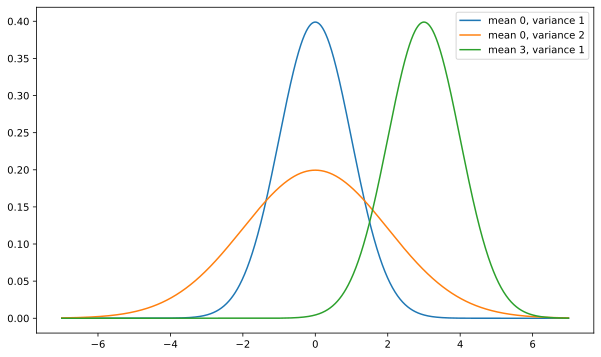

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
from mxnet import nd
import math

x = nd.arange(-7, 7, 0.01)
# Mean and variance pairs
parameters = [(0,1), (0,2), (3,1)]

# Display SVG rather than JPG
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))

plt.legend()
plt.show()

As can be seen in the figure above, changing the mean shifts the function, increasing the variance makes it more spread-out with a lower peak. The key assumption in linear regression with least mean squares loss is that the observations actually arise from noisy observations, where noise is added to the data, e.g. as part of the observations process.

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)$$

This allows us to write out the *likelihood* of seeing a particular $y$ for a given $\mathbf{x}$ via

$$p(y|\mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$

A good way of finding the most likely values of $b$ and $\mathbf{w}$ is to maximize the *likelihood* of the entire dataset

$$p(Y|X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)})$$

The notion of maximizing the likelihood of the data subject to the parameters is well known as the *Maximum Likelihood Principle* and its estimators are usually called *Maximum Likelihood Estimators* (MLE). Unfortunately, maximizing the product of many exponential functions is pretty awkward, both in terms of implementation and in terms of writing it out on paper. Instead, a much better way is to minimize the *Negative Log-Likelihood* $-\log P(Y|X)$. In the above case this works out to be

$$-\log P(Y|X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$$

A closer inspection reveals that for the purpose of minimizing $-\log P(Y|X)$ we can skip the first term since it doesn't depend on $\mathbf{w}, b$ or even the data. The second term is identical to the objective we initially introduced, but for the multiplicative constant $\frac{1}{\sigma^2}$. Again, this can be skipped if we just want to get the most likely solution. It follows that maximum likelihood in a linear model with additive Gaussian noise is equivalent to linear regression with squared loss.

## Summary

* Key ingredients in a machine learning model are training data, a loss function, an optimization algorithm, and quite obviously, the model itself.
* Vectorizing makes everything better (mostly math) and faster (mostly code).
* Minimizing an objective function and performing maximum likelihood can mean the same thing.
* Linear models are neural networks, too.

## Exercises

1. Assume that we have some data $x_1, \ldots x_n \in \mathbb{R}$. Our goal is to find a constant $b$ such that $\sum_i (x_i - b)^2$ is minimized.
    * Find the optimal closed form solution.
    * What does this mean in terms of the Normal distribution?
1. Assume that we want to solve the optimization problem for linear regression with quadratic loss explicitly in closed form. To keep things simple, you can omit the bias $b$ from the problem.
    * Rewrite the problem in matrix and vector notation (hint - treat all the data as a single matrix).
    * Compute the gradient of the optimization problem with respect to $w$.
    * Find the closed form solution by solving a matrix equation.
    * When might this be better than using stochastic gradient descent (i.e. the incremental optimization approach that we discussed above)? When will this break (hint - what happens for high-dimensional $x$, what if many observations are very similar)?.
1. Assume that the noise model governing the additive noise $\epsilon$ is the exponential distribution. That is, $p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$.
    * Write out the negative log-likelihood of the data under the model $-\log p(Y|X)$.
    * Can you find a closed form solution?
    * Suggest a stochastic gradient descent algorithm to solve this problem. What could possibly go wrong (hint - what happens near the stationary point as we keep on updating the parameters). Can you fix this?
1. Compare the runtime of the two methods of adding two vectors using other packages (such as NumPy) or other programming languages (such as MATLAB).

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2331)

![](../img/qr_linear-regression.svg)